Lambda School Data Science

*Unit 2, Sprint 3, Module 1*

---


# Define ML problems

You will use your portfolio project dataset for all assignments this sprint.

## Assignment

Complete these tasks for your project, and document your decisions.

- [ ] Choose your target. Which column in your tabular dataset will you predict?
- [ ] Is your problem regression or classification?
- [ ] How is your target distributed?
    - Classification: How many classes? Are the classes imbalanced?
    - Regression: Is the target right-skewed? If so, you may want to log transform the target.
- [ ] Choose which observations you will use to train, validate, and test your model.
    - Are some observations outliers? Will you exclude them?
    - Will you do a random split or a time-based split?
- [ ] Choose your evaluation metric(s).
    - Classification: Is your majority class frequency > 50% and < 70% ? If so, you can just use accuracy if you want. Outside that range, accuracy could be misleading. What evaluation metric will you choose, in addition to or instead of accuracy?
- [ ] Begin to clean and explore your data.
- [ ] Begin to choose which features, if any, to exclude. Would some features "leak" future information?

In [42]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

pd.options.display.max_columns = 999

dat_df = pd.read_csv("../data/ufc/data.csv")
prep_dat_df = pd.read_csv("../data/ufc/preprocessed_data.csv")
raw_fighters_df = pd.read_csv("../data/ufc/raw_fighter_details.csv")
raw_dat_df = pd.read_csv("../data/ufc/raw_total_fight_data.csv", sep=";")

dat_df.head()

,R_fighter,B_fighter,Referee,date,location,Winner,title_bout,weight_class,no_of_rounds,B_current_lose_streak,B_current_win_streak,B_draw,B_avg_BODY_att,B_avg_BODY_landed,B_avg_CLINCH_att,B_avg_CLINCH_landed,B_avg_DISTANCE_att,B_avg_DISTANCE_landed,B_avg_GROUND_att,B_avg_GROUND_landed,B_avg_HEAD_att,B_avg_HEAD_landed,B_avg_KD,B_avg_LEG_att,B_avg_LEG_landed,B_avg_PASS,B_avg_REV,B_avg_SIG_STR_att,B_avg_SIG_STR_landed,B_avg_SIG_STR_pct,B_avg_SUB_ATT,B_avg_TD_att,B_avg_TD_landed,B_avg_TD_pct,B_avg_TOTAL_STR_att,B_avg_TOTAL_STR_landed,B_longest_win_streak,B_losses,B_avg_opp_BODY_att,B_avg_opp_BODY_landed,B_avg_opp_CLINCH_att,B_avg_opp_CLINCH_landed,B_avg_opp_DISTANCE_att,B_avg_opp_DISTANCE_landed,B_avg_opp_GROUND_att,B_avg_opp_GROUND_landed,B_avg_opp_HEAD_att,B_avg_opp_HEAD_landed,B_avg_opp_KD,B_avg_opp_LEG_att,B_avg_opp_LEG_landed,B_avg_opp_PASS,B_avg_opp_REV,B_avg_opp_SIG_STR_att,B_avg_opp_SIG_STR_landed,B_avg_opp_SIG_STR_pct,B_avg_opp_SUB_ATT,B_avg_opp_TD_att,B_avg_opp_TD_landed,B_avg_opp_TD_pct,B_avg_opp_TOTAL_STR_att,B_avg_opp_TOTAL_STR_landed,B_total_rounds_fought,B_total_time_fought(seconds),B_total_title_bouts,B_win_by_Decision_Majority,B_win_by_Decision_Split,B_win_by_Decision_Unanimous,B_win_by_KO/TKO,B_win_by_Submission,B_win_by_TKO_Doctor_Stoppage,B_wins,B_Stance,B_Height_cms,B_Reach_cms,B_Weight_lbs,R_current_lose_streak,R_current_win_streak,R_draw,R_avg_BODY_att,R_avg_BODY_landed,R_avg_CLINCH_att,R_avg_CLINCH_landed,R_avg_DISTANCE_att,R_avg_DISTANCE_landed,R_avg_GROUND_att,R_avg_GROUND_landed,R_avg_HEAD_att,R_avg_HEAD_landed,R_avg_KD,R_avg_LEG_att,R_avg_LEG_landed,R_avg_PASS,R_avg_REV,R_avg_SIG_STR_att,R_avg_SIG_STR_landed,R_avg_SIG_STR_pct,R_avg_SUB_ATT,R_avg_TD_att,R_avg_TD_landed,R_avg_TD_pct,R_avg_TOTAL_STR_att,R_avg_TOTAL_STR_landed,R_longest_win_streak,R_losses,R_avg_opp_BODY_att,R_avg_opp_BODY_landed,R_avg_opp_CLINCH_att,R_avg_opp_CLINCH_landed,R_avg_opp_DISTANCE_att,R_avg_opp_DISTANCE_landed,R_avg_opp_GROUND_att,R_avg_opp_GROUND_landed,R_avg_opp_HEAD_att,R_avg_opp_HEAD_landed,R_avg_opp_KD,R_avg_opp_LEG_att,R_avg_opp_LEG_landed,R_avg_opp_PASS,R_avg_opp_REV,R_avg_opp_SIG_STR_att,R_avg_opp_SIG_STR_landed,R_avg_opp_SIG_STR_pct,R_avg_opp_SUB_ATT,R_avg_opp_TD_att,R_avg_opp_TD_landed,R_avg_opp_TD_pct,R_avg_opp_TOTAL_STR_att,R_avg_opp_TOTAL_STR_landed,R_total_rounds_fought,R_total_time_fought(seconds),R_total_title_bouts,R_win_by_Decision_Majority,R_win_by_Decision_Split,R_win_by_Decision_Unanimous,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_wins,R_Stance,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age
0,Henry Cejudo,Marlon Moraes,Marc Goddard,2019-06-08,"Chicago, Illinois, USA",Red,True,Bantamweight,5,0.0,4.0,0.0,9.200000,6.000000,0.200000,0.000000,62.600000,20.600000,2.600000,2.000000,48.600000,11.200000,0.800000,7.6,5.400000,0.400000,0.000000,65.40,22.600000,0.466000,0.400000,0.80000,0.200000,0.100000,66.400000,23.600000,4.0,1.0,6.400000,4.000000,1.000000,0.60000,51.200000,17.400000,0.600000,0.200000,39.600000,9.400000,0.200000,6.80000,4.800000,0.000000,0.000000,52.800000,18.20000,0.236000,0.000000,1.000000,0.400000,0.100000,53.800000,19.200000,9.0,419.400000,0.0,0.0,1.0,0.0,2.0,1.0,0.0,4.0,Orthodox,167.64,170.18,135.0,0.0,4.0,0.0,21.900000,16.400000,17.000000,11.000000,75.000000,26.500000,9.400000,6.500000,74.200000,23.90,0.400,5.300000,3.700000,1.200000,0.000000,101.400000,44.000000,0.466000,0.100000,5.300000,1.900000,0.458000,129.900000,69.100000,4.0,2.0,13.300000,8.800000,7.500000,5.100000,90.500000,26.800000,0.800000,0.300000,76.100000,17.300000,0.100000,9.400000,6.100000,0.000000,0.000000,98.800000,32.200000,0.336000,0.000000,0.900000,0.100000,0.050000,110.500000,43.300000,27.0,742.60,3.0,0.0,2.0,4.0,2.0,0.0,0.0,8.0,Orthodox,162.56,162.56,135.0,31.0,32.0
1,Valentina Shevchenko,Jessica Eye,Robert Madrigal,2019-06-08,"Chicago, Illinois, USA",Red,True,Women's Flyweight,5,0.0,3.0,0.0,14.600000,9.100000,11.800000,7.300000,124.700000,42.100000,2.400000,1.900000,112.000000,32.000000,0.000000,

In [43]:
prep_dat_df.head()

,Winner,title_bout,no_of_rounds,B_current_lose_streak,B_current_win_streak,B_draw,B_avg_BODY_att,B_avg_BODY_landed,B_avg_CLINCH_att,B_avg_CLINCH_landed,B_avg_DISTANCE_att,B_avg_DISTANCE_landed,B_avg_GROUND_att,B_avg_GROUND_landed,B_avg_HEAD_att,B_avg_HEAD_landed,B_avg_KD,B_avg_LEG_att,B_avg_LEG_landed,B_avg_PASS,B_avg_REV,B_avg_SIG_STR_att,B_avg_SIG_STR_landed,B_avg_SIG_STR_pct,B_avg_SUB_ATT,B_avg_TD_att,B_avg_TD_landed,B_avg_TD_pct,B_avg_TOTAL_STR_att,B_avg_TOTAL_STR_landed,B_longest_win_streak,B_losses,B_avg_opp_BODY_att,B_avg_opp_BODY_landed,B_avg_opp_CLINCH_att,B_avg_opp_CLINCH_landed,B_avg_opp_DISTANCE_att,B_avg_opp_DISTANCE_landed,B_avg_opp_GROUND_att,B_avg_opp_GROUND_landed,B_avg_opp_HEAD_att,B_avg_opp_HEAD_landed,B_avg_opp_KD,B_avg_opp_LEG_att,B_avg_opp_LEG_landed,B_avg_opp_PASS,B_avg_opp_REV,B_avg_opp_SIG_STR_att,B_avg_opp_SIG_STR_landed,B_avg_opp_SIG_STR_pct,B_avg_opp_SUB_ATT,B_avg_opp_TD_att,B_avg_opp_TD_landed,B_avg_opp_TD_pct,B_avg_opp_TOTAL_STR_att,B_avg_opp_TOTAL_STR_landed,B_total_rounds_fought,B_total_time_fought(seconds),B_total_title_bouts,B_win_by_Decision_Majority,B_win_by_Decision_Split,B_win_by_Decision_Unanimous,B_win_by_KO/TKO,B_win_by_Submission,B_win_by_TKO_Doctor_Stoppage,B_wins,B_Height_cms,B_Reach_cms,B_Weight_lbs,R_current_lose_streak,R_current_win_streak,R_draw,R_avg_BODY_att,R_avg_BODY_landed,R_avg_CLINCH_att,R_avg_CLINCH_landed,R_avg_DISTANCE_att,R_avg_DISTANCE_landed,R_avg_GROUND_att,R_avg_GROUND_landed,R_avg_HEAD_att,R_avg_HEAD_landed,R_avg_KD,R_avg_LEG_att,R_avg_LEG_landed,R_avg_PASS,R_avg_REV,R_avg_SIG_STR_att,R_avg_SIG_STR_landed,R_avg_SIG_STR_pct,R_avg_SUB_ATT,R_avg_TD_att,R_avg_TD_landed,R_avg_TD_pct,R_avg_TOTAL_STR_att,R_avg_TOTAL_STR_landed,R_longest_win_streak,R_losses,R_avg_opp_BODY_att,R_avg_opp_BODY_landed,R_avg_opp_CLINCH_att,R_avg_opp_CLINCH_landed,R_avg_opp_DISTANCE_att,R_avg_opp_DISTANCE_landed,R_avg_opp_GROUND_att,R_avg_opp_GROUND_landed,R_avg_opp_HEAD_att,R_avg_opp_HEAD_landed,R_avg_opp_KD,R_avg_opp_LEG_att,R_avg_opp_LEG_landed,R_avg_opp_PASS,R_avg_opp_REV,R_avg_opp_SIG_STR_att,R_avg_opp_SIG_STR_landed,R_avg_opp_SIG_STR_pct,R_avg_opp_SUB_ATT,R_avg_opp_TD_att,R_avg_opp_TD_landed,R_avg_opp_TD_pct,R_avg_opp_TOTAL_STR_att,R_avg_opp_TOTAL_STR_landed,R_total_rounds_fought,R_total_time_fought(seconds),R_total_title_bouts,R_win_by_Decision_Majority,R_win_by_Decision_Split,R_win_by_Decision_Unanimous,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_wins,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age,weight_class_Bantamweight,weight_class_Catch Weight,weight_class_Featherweight,weight_class_Flyweight,weight_class_Heavyweight,weight_class_Light Heavyweight,weight_class_Lightweight,weight_class_Middleweight,weight_class_Open Weight,weight_class_Welterweight,weight_class_Women's Bantamweight,weight_class_Women's Featherweight,weight_class_Women's Flyweight,weight_class_Women's Strawweight,B_Stance_Open Stance,B_Stance_Orthodox,B_Stance_Sideways,B_Stance_Southpaw,B_Stance_Switch,R_Stance_Open Stance,R_Stance_Orthodox,R_Stance_Southpaw,R_Stance_Switch
0,Red,True,5,0.0,4.0,0.0,9.200000,6.000000,0.200000,0.000000,62.600000,20.600000,2.600000,2.000000,48.600000,11.200000,0.800000,7.6,5.400000,0.400000,0.000000,65.40,22.600000,0.466000,0.400000,0.80000,0.200000,0.100000,66.400000,23.600000,4.0,1.0,6.400000,4.000000,1.000000,0.60000,51.200000,17.400000,0.600000,0.200000,39.600000,9.400000,0.200000,6.80000,4.800000,0.000000,0.000000,52.800000,18.20000,0.236000,0.000000,1.000000,0.400000,0.100000,53.800000,19.200000,9.0,419.400000,0.0,0.0,1.0,0.0,2.0,1.0,0.0,4.0,167.64,170.18,135.0,0.0,4.0,0.0,21.900000,16.400000,17.000000,11.000000,75.000000,26.500000,9.400000,6.500000,74.200000,23.90,0.400,5.300000,3.700000,1.200000,0.000000,101.400000,44.000000,0.466000,0.100000,5.300000,1.900000,0.458000,129.900000,69.100000,4.0,2.0,13.300000,8.800000,7.500000,5.100000,90.500000,26.800000,0.800000,0.300000,76.100000,17.300000,0.100000,9.400000,6.100000,0.000000,0.000000,98.800000,32.20000

In [44]:
raw_fighters_df.tail()

,fighter_name,Height,Weight,Reach,Stance,DOB
3308,Zelim Imadaev,"6' 0""",170 lbs.,"76""",Orthodox,"Jan 25, 1995"
3309,Zhang Lipeng,"5' 11""",155 lbs.,"71""",Southpaw,"Mar 10, 1990"
3310,Zoila Frausto,"5' 4""",135 lbs.,NaN,Orthodox,NaN
3311,Zu Anyanwu,"6' 1""",251 lbs.,"77""",Orthodox,"Aug 05, 1981"
3312,Zubaira Tukhugov,"5' 8""",145 lbs.,"68""",Orthodox,"Jan 15, 1991"


In [45]:
raw_dat_df.head()

,R_fighter,B_fighter,R_KD,B_KD,R_SIG_STR.,B_SIG_STR.,R_SIG_STR_pct,B_SIG_STR_pct,R_TOTAL_STR.,B_TOTAL_STR.,R_TD,B_TD,R_TD_pct,B_TD_pct,R_SUB_ATT,B_SUB_ATT,R_PASS,B_PASS,R_REV,B_REV,R_HEAD,B_HEAD,R_BODY,B_BODY,R_LEG,B_LEG,R_DISTANCE,B_DISTANCE,R_CLINCH,B_CLINCH,R_GROUND,B_GROUND,win_by,last_round,last_round_time,Format,Referee,date,location,Fight_type,Winner
0,Henry Cejudo,Marlon Moraes,0,0,90 of 171,57 of 119,52%,47%,99 of 182,59 of 121,1 of 4,0 of 2,25%,0%,1,0,1,0,0,0,73 of 150,35 of 89,13 of 16,7 of 8,4 of 5,15 of 22,45 of 118,54 of 116,19 of 23,2 of 2,26 of 30,1 of 1,KO/TKO,3,4:51,5 Rnd (5-5-5-5-5),Marc Goddard,"June 08, 2019","Chicago, Illinois, USA",UFC Bantamweight Title Bout,Henry Cejudo
1,Valentina Shevchenko,Jessica Eye,1,0,8 of 11,2 of 12,72%,16%,37 of 40,42 of 52,2 of 2,0 of 0,100%,0%,1,0,3,0,0,0,4 of 5,0 of 7,4 of 6,0 of 2,0 of 0,2 of 3,5 of 8,2 of 12,2 of 2,0 of 0,1 of 1,0 of 0,KO/TKO,2,0:26,5 Rnd (5-5-5-5-5),Robert Madrigal,"June 08, 2019","Chicago, Illinois, USA",UFC Women's Flyweight Title Bout,Valentina Shevchenko
2,Tony Ferguson,Donald Cerrone,0,0,104 of 200,68 of 185,52%,36%,104 of 200,68 of 185,0 of 0,1 of 1,0%,100%,0,0,0,0,0,0,65 of 144,43 of 152,25 of 37,15 of 23,14 of 19,10 of 10,103 of 198,68 of 184,1 of 2,0 of 1,0 of 0,0 of 0,TKO - Doctor's Stoppage,2,5:00,3 Rnd (5-5-5),Dan Miragliotta,"June 08, 2019","Chicago, Illinois, USA",Lightweight Bout,Tony Ferguson
3,Jimmie Rivera,Petr Yan,0,2,73 of 192,56 of 189,38%,29%,76 of 195,58 of 192,0 of 3,1 of 3,0%,33%,0,0,0,1,0,0,42 of 145,40 of 166,15 of 24,13 of 19,16 of 23,3 of 4,60 of 173,42 of 167,9 of 15,10 of 12,4 of 4,4 of 10,Decision - Unanimous,3,5:00,3 Rnd (5-5-5),Kevin MacDonald,"June 08, 2019","Chicago, Illinois, USA",Bantamweight Bout,Petr Yan
4,Tai Tuivasa,Blagoy Ivanov,0,1,64 of 144,73 of 123,44%,59%,66 of 146,81 of 131,0 of 0,2 of 2,0%,100%,0,0,0,0,0,0,39 of 114,65 of 114,6 of 7,7 of 8,19 of 23,1 of 1,50 of 126,62 of 111,14 of 18,5 of 6,0 of 0,6 of 6,Decision - Unanimous,3,5:00,3 Rnd (5-5-5),Dan Miragliotta,"June 08, 2019","Chicago, Illinois, USA",Heavyweight Bout,Blagoy Ivanov


In [46]:
# I'd like to have one row per fighter per fight. That is, 2 rows per fight, with a simple "is_winner" column.

r_fighter_cols = [col for col in dat_df.columns if col.startswith("R_")]
b_fighter_cols = [col for col in dat_df.columns if col.startswith("B_")]

other_cols = [col for col in dat_df.columns if col not in r_fighter_cols and col not in b_fighter_cols]

In [47]:
import re

def extractFighters(dat_df, fighter_cols, opp_cols, fighter_prefix, opp_prefix, fighter_color):

    fighters_df = dat_df[fighter_cols + other_cols].copy()
    fighters_df.columns = [col.replace(fighter_prefix, "") for col in fighters_df.columns]
    fighters_df["is_winner"] = fighters_df["Winner"] == fighter_color

    opp_df = dat_df[opp_cols].copy()
    opp_df.columns = [re.sub(r"^" + opp_prefix, "opponent_", col) for col in opp_df.columns]

    fighters_df = pd.concat([fighters_df, opp_df], axis=1)
    
    return fighters_df


In [48]:
r_fighters_df = extractFighters(dat_df, r_fighter_cols, b_fighter_cols, "R_", "B_", "Red")
b_fighters_df = extractFighters(dat_df, b_fighter_cols, r_fighter_cols, "B_", "R_", "Blue")

In [49]:
fighters_df = pd.concat([r_fighters_df, b_fighters_df], axis=0)
fighters_df.head()

,Height_cms,Reach_cms,Referee,Stance,Weight_lbs,Winner,age,avg_BODY_att,avg_BODY_landed,avg_CLINCH_att,avg_CLINCH_landed,avg_DISTANCE_att,avg_DISTANCE_landed,avg_GROUND_att,avg_GROUND_landed,avg_HEAD_att,avg_HEAD_landed,avg_KD,avg_LEG_att,avg_LEG_landed,avg_PASS,avg_REV,avg_SIG_STR_att,avg_SIG_STR_landed,avg_SIG_STR_pct,avg_SIG_STatt,avg_SIG_STlanded,avg_SIG_STpct,avg_SUATT,avg_SUB_ATT,avg_TD_att,avg_TD_landed,avg_TD_pct,avg_TOTAL_STR_att,avg_TOTAL_STR_landed,avg_TOTAL_STatt,avg_TOTAL_STlanded,avg_opp_BODY_att,avg_opp_BODY_landed,avg_opp_CLINCH_att,avg_opp_CLINCH_landed,avg_opp_DISTANCE_att,avg_opp_DISTANCE_landed,avg_opp_GROUND_att,avg_opp_GROUND_landed,avg_opp_HEAD_att,avg_opp_HEAD_landed,avg_opp_KD,avg_opp_LEG_att,avg_opp_LEG_landed,avg_opp_PASS,avg_opp_REV,avg_opp_SIG_STR_att,avg_opp_SIG_STR_landed,avg_opp_SIG_STR_pct,avg_opp_SIG_STatt,avg_opp_SIG_STlanded,avg_opp_SIG_STpct,avg_opp_SUATT,avg_opp_SUB_ATT,avg_opp_TD_att,avg_opp_TD_landed,avg_opp_TD_pct,avg_opp_TOTAL_STR_att,avg_opp_TOTAL_STR_landed,avg_opp_TOTAL_STatt,avg_opp_TOTAL_STlanded,current_lose_streak,current_win_streak,date,draw,fighter,is_winner,location,longest_win_streak,losses,no_of_rounds,opponent_Height_cms,opponent_Reach_cms,opponent_Stance,opponent_Weight_lbs,opponent_age,opponent_avg_BODY_att,opponent_avg_BODY_landed,opponent_avg_CLINCH_att,opponent_avg_CLINCH_landed,opponent_avg_DISTANCE_att,opponent_avg_DISTANCE_landed,opponent_avg_GROUND_att,opponent_avg_GROUND_landed,opponent_avg_HEAD_att,opponent_avg_HEAD_landed,opponent_avg_KD,opponent_avg_LEG_att,opponent_avg_LEG_landed,opponent_avg_PASS,opponent_avg_REV,opponent_avg_SIG_STR_att,opponent_avg_SIG_STR_landed,opponent_avg_SIG_STR_pct,opponent_avg_SUB_ATT,opponent_avg_TD_att,opponent_avg_TD_landed,opponent_avg_TD_pct,opponent_avg_TOTAL_STR_att,opponent_avg_TOTAL_STR_landed,opponent_avg_opp_BODY_att,opponent_avg_opp_BODY_landed,opponent_avg_opp_CLINCH_att,opponent_avg_opp_CLINCH_landed,opponent_avg_opp_DISTANCE_att,opponent_avg_opp_DISTANCE_landed,opponent_avg_opp_GROUND_att,opponent_avg_opp_GROUND_landed,opponent_avg_opp_HEAD_att,opponent_avg_opp_HEAD_landed,opponent_avg_opp_KD,opponent_avg_opp_LEG_att,opponent_avg_opp_LEG_landed,opponent_avg_opp_PASS,opponent_avg_opp_REV,opponent_avg_opp_SIG_STR_att,opponent_avg_opp_SIG_STR_landed,opponent_avg_opp_SIG_STR_pct,opponent_avg_opp_SUB_ATT,opponent_avg_opp_TD_att,opponent_avg_opp_TD_landed,opponent_avg_opp_TD_pct,opponent_avg_opp_TOTAL_STR_att,opponent_avg_opp_TOTAL_STR_landed,opponent_current_lose_streak,opponent_current_win_streak,opponent_draw,opponent_fighter,opponent_longest_win_streak,opponent_losses,opponent_total_rounds_fought,opponent_total_time_fought(seconds),opponent_total_title_bouts,opponent_win_by_Decision_Majority,opponent_win_by_Decision_Split,opponent_win_by_Decision_Unanimous,opponent_win_by_KO/TKO,opponent_win_by_Submission,opponent_win_by_TKO_Doctor_Stoppage,opponent_wins,title_bout,total_rounds_fought,total_time_fought(seconds),total_title_bouts,weight_class,win_by_Decision_Majority,win_by_Decision_Split,win_by_Decision_Unanimous,win_by_KO/TKO,win_by_Submission,win_by_TKO_Doctor_Stoppage,wins
0,162.56,162.56,Marc Goddard,Orthodox,135.0,Red,32.0,21.900000,16.400000,17.000000,11.000000,75.000000,26.500000,9.400000,6.500000,74.200000,23.90,0.400,5.300000,3.700000,1.200000,0.000000,NaN,NaN,NaN,101.400000,44.000000,0.466000,NaN,0.100000,5.300000,1.900000,0.458000,NaN,NaN,129.900000,69.100000,13.300000,8.800000,7.500000,5.100000,90.500000,26.800000,0.800000,0.300000,76.100000,17.300000,0.100000,9.400000,6.100000,0.000000,0.000000,NaN,NaN,NaN,98.800000,32.200000,0.336000,NaN,0.000000,0.900000,0.100000,0.050000,NaN,NaN,110.500000,43.300000,0.0,4.0,2019-06-08,0.0,Henry Cejudo,True,"Chicago, Illinois, USA",4.0,2.0,5,167.64,170.18,Orthodox,135.0,31.0,9.200000,6.000000,0.200000,0.000000,62.600000,20.600000,2.600000,2.000000,48.600000,11.200000,0.800000,7.6,5.400000,0.400000,0.000000,65.40,22.600000,0.466000,0.400000,0.80000,0.200000,0.100000,66.400

In [50]:
for col in [col for col in fighters_df.select_dtypes(include="number").columns if col.startswith("opponent_")]:
    
    col2 = col
    col1 = col[9:]
    
    fighters_df["ratio_" + col1] = (fighters_df[col1] + 1) / (fighters_df[col2] + 1)

fighters_df["stance_config"] = fighters_df["Stance"] + "-" + fighters_df["opponent_Stance"]

In [51]:
# prevent leakage
fighters_df = fighters_df.drop(columns="Winner")

In [52]:
# clean up raw_fighters_df

inches_re = re.compile(r"\s*((?P<feet>\d+)')?\s*((?P<inches>\d+)\")\s*")

# tests
t1 = inches_re.match("6' 5\"")
print(t1.group("feet"), t1.group("inches"))

t2 = inches_re.match("58\"")
print(t2.group("feet"), t2.group("inches"))

def toInches(s):
    
    if s == np.NaN:
        return np.NaN
    
    m = inches_re.match(str(s))
    if not m:
        return np.NaN
    
    res = int(m.group("inches"))
    if m.group("feet") is not None:
        res += int(m.group("feet"))*12
        
    return res

raw_fighters_df["Height"] = raw_fighters_df["Height"].apply(toInches)
raw_fighters_df["Reach"] = raw_fighters_df["Reach"].apply(toInches)

raw_fighters_df.head()

6 5
None 58


,fighter_name,Height,Weight,Reach,Stance,DOB
0,AJ Fonseca,64.0,145 lbs.,NaN,NaN,NaN
1,AJ Matthews,71.0,185 lbs.,NaN,NaN,NaN
2,AJ McKee,70.0,145 lbs.,NaN,NaN,NaN
3,AJ Siscoe,67.0,135 lbs.,NaN,NaN,NaN
4,Aalon Cruz,72.0,145 lbs.,NaN,NaN,NaN


In [53]:
raw_fighters_df.tail()

,fighter_name,Height,Weight,Reach,Stance,DOB
3308,Zelim Imadaev,72.0,170 lbs.,76.0,Orthodox,"Jan 25, 1995"
3309,Zhang Lipeng,71.0,155 lbs.,71.0,Southpaw,"Mar 10, 1990"
3310,Zoila Frausto,64.0,135 lbs.,NaN,Orthodox,NaN
3311,Zu Anyanwu,73.0,251 lbs.,77.0,Orthodox,"Aug 05, 1981"
3312,Zubaira Tukhugov,68.0,145 lbs.,68.0,Orthodox,"Jan 15, 1991"


In [54]:
raw_fighters_df["DOB"] = pd.to_datetime(raw_fighters_df["DOB"])

lbs_re = re.compile(r"\s*(?P<lbs>\d+)\s*lbs\.")

def toLbs(s):
    
    if s == np.NaN:
        return np.NaN
    
    m = lbs_re.match(str(s))
    if not m:
        return np.NaN
    
    return int(m.group("lbs"))

raw_fighters_df["Weight"] = raw_fighters_df["Weight"].apply(toLbs)

raw_fighters_df.tail()

,fighter_name,Height,Weight,Reach,Stance,DOB
3308,Zelim Imadaev,72.0,170.0,76.0,Orthodox,1995-01-25
3309,Zhang Lipeng,71.0,155.0,71.0,Southpaw,1990-03-10
3310,Zoila Frausto,64.0,135.0,NaN,Orthodox,NaT
3311,Zu Anyanwu,73.0,251.0,77.0,Orthodox,1981-08-05
3312,Zubaira Tukhugov,68.0,145.0,68.0,Orthodox,1991-01-15


In [55]:
import category_encoders as ce
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

from sklearn.pipeline import make_pipeline

from sklearn.metrics import accuracy_score

pipeline = make_pipeline(
    ce.OneHotEncoder(),
    SimpleImputer(strategy="most_frequent"),
    StandardScaler(),
    RandomForestClassifier(n_jobs=-1, n_estimators=120)
)

In [68]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(fighters_df)

target = "is_winner"
features = fighters_df.columns.drop([target] + ["age", "ratio_age", "opponent_age"])

X_train = train[features]
y_train = train[target]

X_test = test[features]
y_test = test[target]

pipeline.fit(X_train, y_train)
pipeline.score(X_test, y_test)

0.6555209953343701

In [69]:
import seaborn as sns

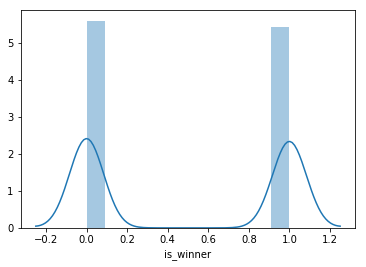

In [70]:
# How is your target distributed?
# total win-loss ratio is expected is to be 50-50 since each 

sns.distplot(fighters_df[target].astype(np.int64))

In [71]:
# Choose which observations you will use to train, validate, and test your model.
# I will use a random split. I don't want to split based on dates becaue UFC stats have changed over time.

In [72]:
# Choose your evaluation metric(s).
# I believe it would only make sense to do this based on accuracy.
# since we're essentially choosing one class out of two for each trial

In [73]:
fighters_df.head(5)

,Height_cms,Reach_cms,Referee,Stance,Weight_lbs,age,avg_BODY_att,avg_BODY_landed,avg_CLINCH_att,avg_CLINCH_landed,avg_DISTANCE_att,avg_DISTANCE_landed,avg_GROUND_att,avg_GROUND_landed,avg_HEAD_att,avg_HEAD_landed,avg_KD,avg_LEG_att,avg_LEG_landed,avg_PASS,avg_REV,avg_SIG_STR_att,avg_SIG_STR_landed,avg_SIG_STR_pct,avg_SIG_STatt,avg_SIG_STlanded,avg_SIG_STpct,avg_SUATT,avg_SUB_ATT,avg_TD_att,avg_TD_landed,avg_TD_pct,avg_TOTAL_STR_att,avg_TOTAL_STR_landed,avg_TOTAL_STatt,avg_TOTAL_STlanded,avg_opp_BODY_att,avg_opp_BODY_landed,avg_opp_CLINCH_att,avg_opp_CLINCH_landed,avg_opp_DISTANCE_att,avg_opp_DISTANCE_landed,avg_opp_GROUND_att,avg_opp_GROUND_landed,avg_opp_HEAD_att,avg_opp_HEAD_landed,avg_opp_KD,avg_opp_LEG_att,avg_opp_LEG_landed,avg_opp_PASS,avg_opp_REV,avg_opp_SIG_STR_att,avg_opp_SIG_STR_landed,avg_opp_SIG_STR_pct,avg_opp_SIG_STatt,avg_opp_SIG_STlanded,avg_opp_SIG_STpct,avg_opp_SUATT,avg_opp_SUB_ATT,avg_opp_TD_att,avg_opp_TD_landed,avg_opp_TD_pct,avg_opp_TOTAL_STR_att,avg_opp_TOTAL_STR_landed,avg_opp_TOTAL_STatt,avg_opp_TOTAL_STlanded,current_lose_streak,current_win_streak,date,draw,fighter,is_winner,location,longest_win_streak,losses,no_of_rounds,opponent_Height_cms,opponent_Reach_cms,opponent_Stance,opponent_Weight_lbs,opponent_age,opponent_avg_BODY_att,opponent_avg_BODY_landed,opponent_avg_CLINCH_att,opponent_avg_CLINCH_landed,opponent_avg_DISTANCE_att,opponent_avg_DISTANCE_landed,opponent_avg_GROUND_att,opponent_avg_GROUND_landed,opponent_avg_HEAD_att,opponent_avg_HEAD_landed,opponent_avg_KD,opponent_avg_LEG_att,opponent_avg_LEG_landed,opponent_avg_PASS,opponent_avg_REV,opponent_avg_SIG_STR_att,opponent_avg_SIG_STR_landed,opponent_avg_SIG_STR_pct,opponent_avg_SUB_ATT,opponent_avg_TD_att,opponent_avg_TD_landed,opponent_avg_TD_pct,opponent_avg_TOTAL_STR_att,opponent_avg_TOTAL_STR_landed,opponent_avg_opp_BODY_att,opponent_avg_opp_BODY_landed,opponent_avg_opp_CLINCH_att,opponent_avg_opp_CLINCH_landed,opponent_avg_opp_DISTANCE_att,opponent_avg_opp_DISTANCE_landed,opponent_avg_opp_GROUND_att,opponent_avg_opp_GROUND_landed,opponent_avg_opp_HEAD_att,opponent_avg_opp_HEAD_landed,opponent_avg_opp_KD,opponent_avg_opp_LEG_att,opponent_avg_opp_LEG_landed,opponent_avg_opp_PASS,opponent_avg_opp_REV,opponent_avg_opp_SIG_STR_att,opponent_avg_opp_SIG_STR_landed,opponent_avg_opp_SIG_STR_pct,opponent_avg_opp_SUB_ATT,opponent_avg_opp_TD_att,opponent_avg_opp_TD_landed,opponent_avg_opp_TD_pct,opponent_avg_opp_TOTAL_STR_att,opponent_avg_opp_TOTAL_STR_landed,opponent_current_lose_streak,opponent_current_win_streak,opponent_draw,opponent_fighter,opponent_longest_win_streak,opponent_losses,opponent_total_rounds_fought,opponent_total_time_fought(seconds),opponent_total_title_bouts,opponent_win_by_Decision_Majority,opponent_win_by_Decision_Split,opponent_win_by_Decision_Unanimous,opponent_win_by_KO/TKO,opponent_win_by_Submission,opponent_win_by_TKO_Doctor_Stoppage,opponent_wins,title_bout,total_rounds_fought,total_time_fought(seconds),total_title_bouts,weight_class,win_by_Decision_Majority,win_by_Decision_Split,win_by_Decision_Unanimous,win_by_KO/TKO,win_by_Submission,win_by_TKO_Doctor_Stoppage,wins,ratio_Height_cms,ratio_Reach_cms,ratio_Weight_lbs,ratio_age,ratio_avg_BODY_att,ratio_avg_BODY_landed,ratio_avg_CLINCH_att,ratio_avg_CLINCH_landed,ratio_avg_DISTANCE_att,ratio_avg_DISTANCE_landed,ratio_avg_GROUND_att,ratio_avg_GROUND_landed,ratio_avg_HEAD_att,ratio_avg_HEAD_landed,ratio_avg_KD,ratio_avg_LEG_att,ratio_avg_LEG_landed,ratio_avg_PASS,ratio_avg_REV,ratio_avg_SIG_STR_att,ratio_avg_SIG_STR_landed,ratio_avg_SIG_STR_pct,ratio_avg_SUB_ATT,ratio_avg_TD_att,ratio_avg_TD_landed,ratio_avg_TD_pct,ratio_avg_TOTAL_STR_att,ratio_avg_TOTAL_STR_landed,ratio_avg_opp_BODY_att,ratio_avg_opp_BODY_landed,ratio_avg_opp_CLINCH_att,ratio_avg_opp_CLINCH_landed,ratio_avg_opp_DISTANCE_att,ratio_avg_opp_DISTANCE_landed,ratio_avg_opp_GROUND_att,ratio_avg_opp_GROUND_landed,ratio_avg_opp_HEAD_att,ratio_avg_opp_HEAD_landed,ratio_avg_opp_KD,ratio_avg_opp_LEG_att,ratio_avg_opp

In [74]:
y_pred = pipeline.predict(X_test)

from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred)

array([[910, 402],
       [484, 776]])

In [75]:
fighter_names = list(set(fighters_df["fighter"]))
fighter_cols = [col for col in fighters_df.select_dtypes(include="number").columns if not col.startswith("opponent_") and not col.startswith("ratio_")]
fighter_cols

['Height_cms',
 'Reach_cms',
 'Weight_lbs',
 'age',
 'avg_BODY_att',
 'avg_BODY_landed',
 'avg_CLINCH_att',
 'avg_CLINCH_landed',
 'avg_DISTANCE_att',
 'avg_DISTANCE_landed',
 'avg_GROUND_att',
 'avg_GROUND_landed',
 'avg_HEAD_att',
 'avg_HEAD_landed',
 'avg_KD',
 'avg_LEG_att',
 'avg_LEG_landed',
 'avg_PASS',
 'avg_REV',
 'avg_SIG_STR_att',
 'avg_SIG_STR_landed',
 'avg_SIG_STR_pct',
 'avg_SIG_STatt',
 'avg_SIG_STlanded',
 'avg_SIG_STpct',
 'avg_SUATT',
 'avg_SUB_ATT',
 'avg_TD_att',
 'avg_TD_landed',
 'avg_TD_pct',
 'avg_TOTAL_STR_att',
 'avg_TOTAL_STR_landed',
 'avg_TOTAL_STatt',
 'avg_TOTAL_STlanded',
 'avg_opp_BODY_att',
 'avg_opp_BODY_landed',
 'avg_opp_CLINCH_att',
 'avg_opp_CLINCH_landed',
 'avg_opp_DISTANCE_att',
 'avg_opp_DISTANCE_landed',
 'avg_opp_GROUND_att',
 'avg_opp_GROUND_landed',
 'avg_opp_HEAD_att',
 'avg_opp_HEAD_landed',
 'avg_opp_KD',
 'avg_opp_LEG_att',
 'avg_opp_LEG_landed',
 'avg_opp_PASS',
 'avg_opp_REV',
 'avg_opp_SIG_STR_att',
 'avg_opp_SIG_STR_landed',
 'avg

In [76]:
model = pipeline.named_steps["randomforestclassifier"]
encoder = pipeline.named_steps["onehotencoder"]

encoded_cols = encoder.transform(fighters_df[features]).columns
importances = pd.Series(model.feature_importances_, encoded_cols)

/home/cowley/venv/lambda/lib/python3.6/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


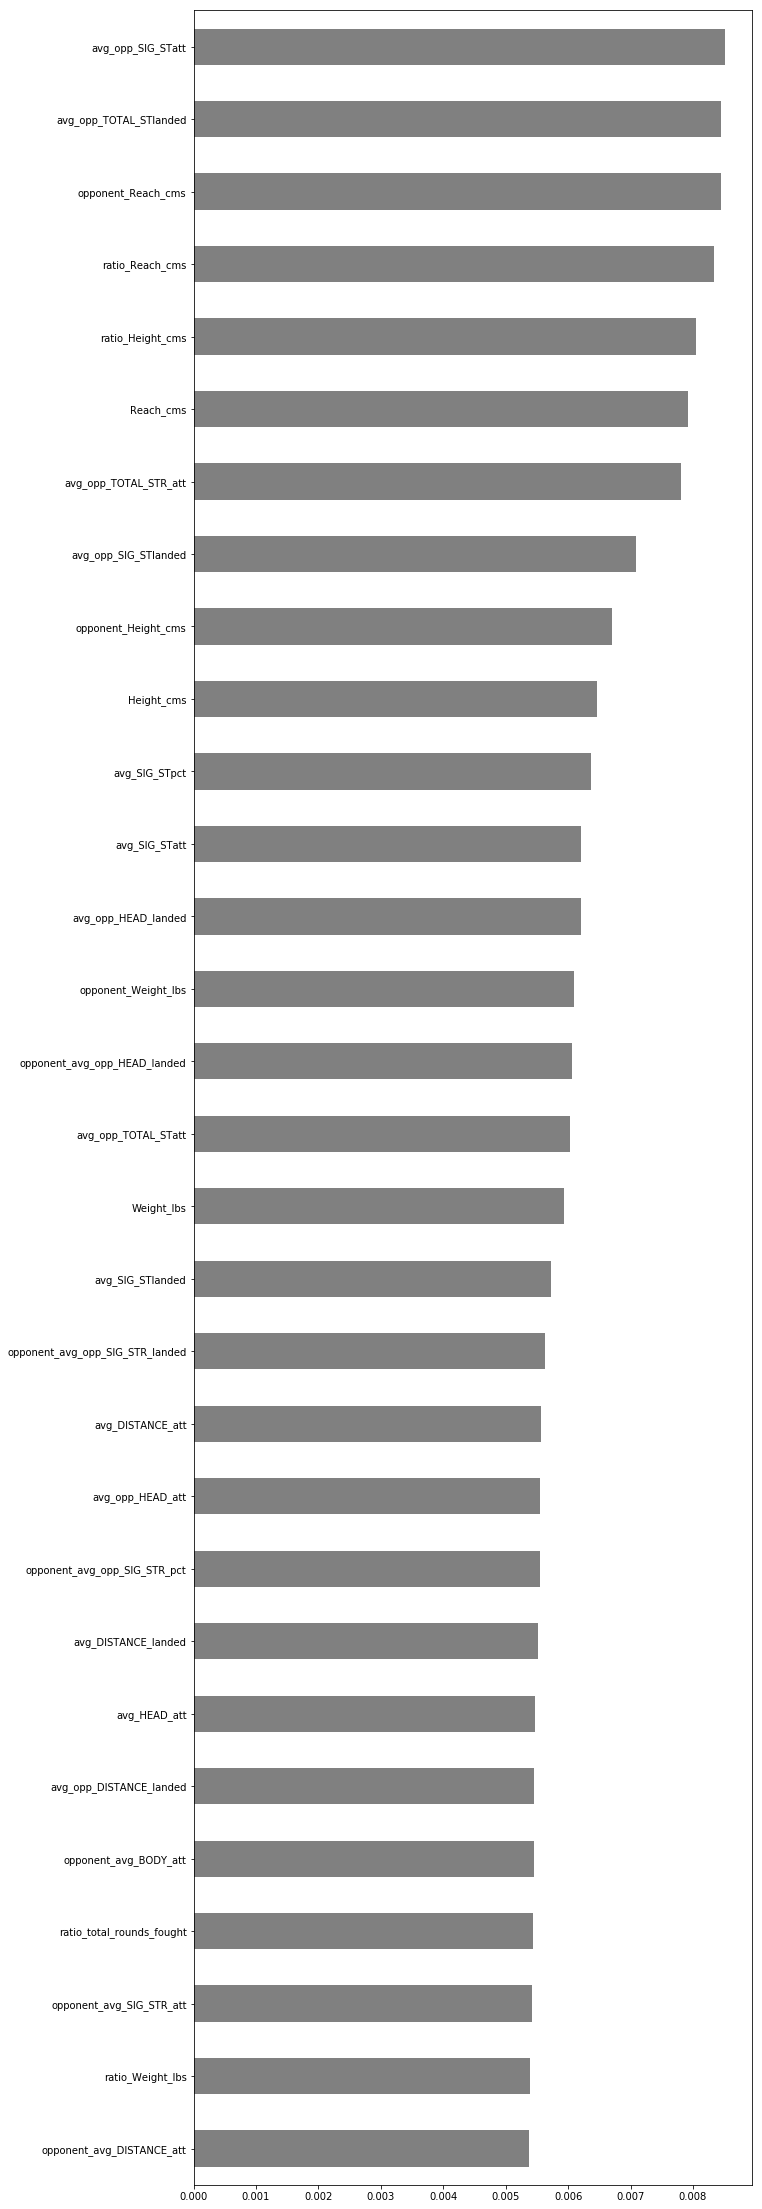

In [77]:
fig, ax = plt.subplots(figsize=(10, 40))
importances.sort_values()[len(importances)-30:].plot.barh(color="gray", ax=ax)

fig.show()